In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
dataset = pd.read_csv('C:/Users/miant/Desktop/Python/Car_price_class.csv')
dataset.head()

,Brand,Force,Year,EngineV,Price_euro
0,Audi,3.58,2000,0.60,3800
1,BMW,4.59,2015,0.65,38888
2,Toyota,4.07,2016,1.00,11708
3,Toyota,4.02,2016,1.00,10500
4,Renault,4.10,2014,1.00,12650


In [4]:
#Selecting x
X = dataset.iloc[:, [0, 1, 2, 3, 4]].values  

In [5]:
# Transforming and scaling data
column_transformer = ColumnTransformer([
    ('brand_encoder', OneHotEncoder(), [0]),  # encoding
    ('scaler', StandardScaler(), [1, 2, 3, 4])  # scale
])

In [6]:
# Apply the transformations
X_transformed = column_transformer.fit_transform(X)

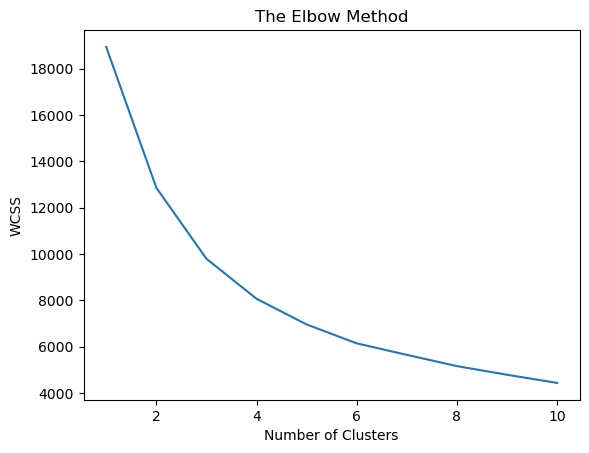

In [7]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Fit the K-Means model 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X_transformed)

In [9]:
# Append the y
dataset['Cluster'] = y_kmeans

In [10]:
dataset.head()

,Brand,Force,Year,EngineV,Price_euro,Cluster
0,Audi,3.58,2000,0.60,3800,1
1,BMW,4.59,2015,0.65,38888,2
2,Toyota,4.07,2016,1.00,11708,2
3,Toyota,4.02,2016,1.00,10500,2
4,Renault,4.10,2014,1.00,12650,2


In [13]:
#Classification
#select x and y
X_classification = dataset.iloc[:, 0:-1].values
y_classification = dataset.iloc[:, -1].values 

In [16]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.25, random_state=0)

In [17]:
#Scaling and encoding 

column_transformer_classification = ColumnTransformer([
    ('brand_encoder', OneHotEncoder(), [0]), 
    ('scaler', StandardScaler(), [1, 2, 3, 4])
])

In [18]:
# Apply the transformations to the training and test sets
X_train = column_transformer_classification.fit_transform(X_train)
X_test = column_transformer_classification.transform(X_test)

In [19]:
# Training the K-NN model
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[1 1]
 [2 2]
 [3 3]
 ...
 [2 2]
 [2 2]
 [2 2]]


In [23]:
# Evaluating the classifier
#cm = confusion_matrix(y_test, y_pred)
#print(cm)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.98001998001998
